   cycle  num_cells    DoFs  estimated_error  exact_error       1/N  \
0      1      12504   13232         7.469550     5.463860  0.000076   
1      2      12564   13299         2.441600     4.461320  0.000075   
2      3      12750   13510         0.867709     3.253490  0.000074   
3      4      13293   14142         0.612924     2.818660  0.000071   
4      5      15003   16123         0.426906     1.919440  0.000062   
5      6      19620   21398         0.248547     1.310650  0.000047   
6      7      31416   34726         0.154934     0.753186  0.000029   
7      8      58926   66056         0.069654     0.385285  0.000015   
8      9     123987  139816         0.033130     0.171786  0.000007   

   err_computed+eps  
0      5.645065e-04  
1      1.835928e-04  
2      6.422717e-05  
3      4.334069e-05  
4      2.647807e-05  
5      1.161543e-05  
6      4.461614e-06  
7      1.054477e-06  
8      2.369521e-07  


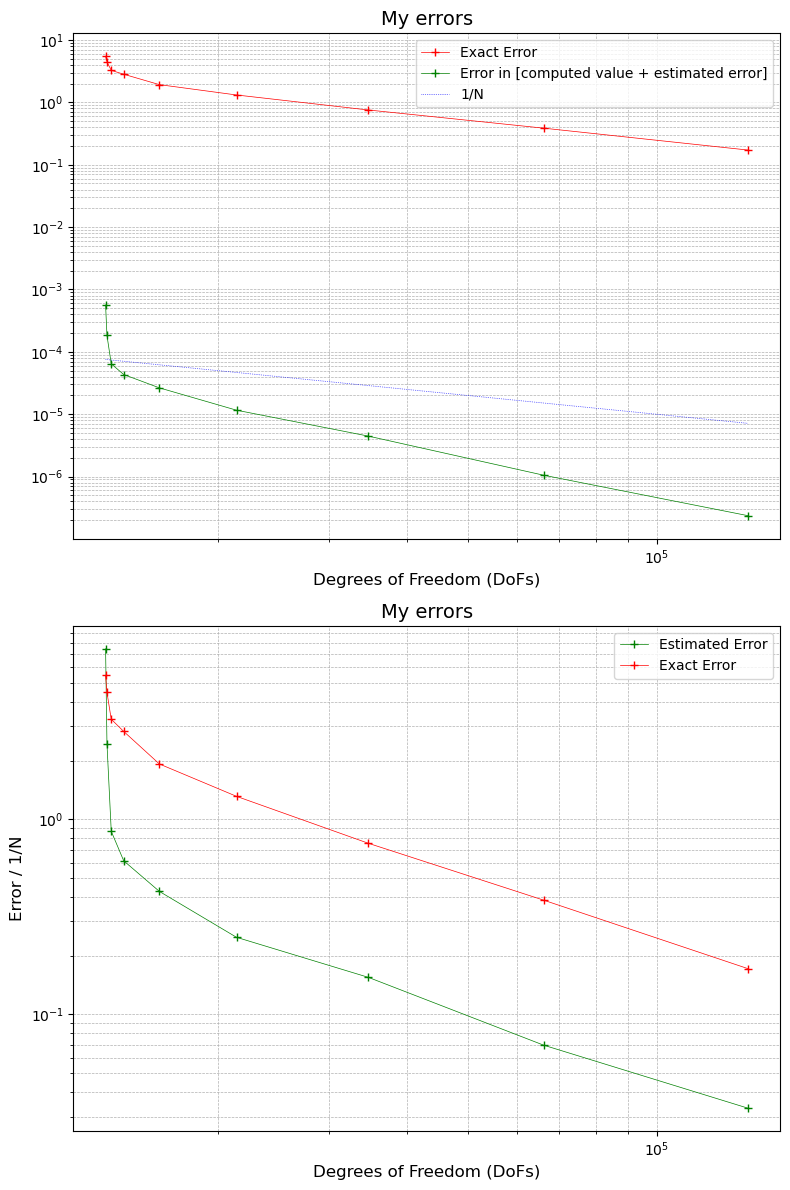

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_name = "/Users/matteom/shared-folder/ion_propulsion/results/GO_smoothing_off-convergence_data.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
data['1/N'] = 1 / data['DoFs']
data['err_computed+eps'] = data['exact_error']-data["estimated_error"]
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['exact_error'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], data['err_computed+eps'],"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.loglog(data['DoFs'], data['1/N'], "b:", linewidth=0.5, label='1/N')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('My errors', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Plot 2: Duplicate plot
plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['estimated_error'],"g-+", linewidth=0.5, label='Estimated Error')
plt.loglog(data['DoFs'], data['exact_error'],"r-+", linewidth=0.5, label='Exact Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error / 1/N', fontsize=12)
plt.title('My errors', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
